# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 11/26/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 11/26/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,2747,38928341,7.1
Albania,8899,2877800,309.2
Algeria,13135,43851043,30.0
Andorra,809,77265,1047.0
Angola,1692,32866268,5.1
Antigua and Barbuda,8,97928,8.2
Argentina,103053,45195777,228.0
Armenia,16487,2963234,556.4
Australia,191,25459700,0.8


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Montenegro,7207,628062,1147.5
Georgia,45536,3989175,1141.5
Luxembourg,6942,625976,1109.0
Andorra,809,77265,1047.0
Slovenia,18688,2078932,898.9
Croatia,36648,4105268,892.7
Austria,74810,9006400,830.6
Serbia,70950,8737370,812.0
Lithuania,21879,2722291,803.7


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

11/22/20     932367.0
11/23/20     946822.0
11/24/20     963192.0
11/25/20     995879.0
11/26/20    1017830.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

11/13/20        NaN
11/14/20    14640.0
11/15/20     3213.0
11/16/20    14580.0
11/17/20    26231.0
11/18/20    23727.0
11/19/20    24041.0
11/20/20    22593.0
11/21/20    13872.0
11/22/20     4377.0
11/23/20    14455.0
11/24/20    16370.0
11/25/20    32687.0
11/26/20    21951.0
Name: Germany, dtype: float64

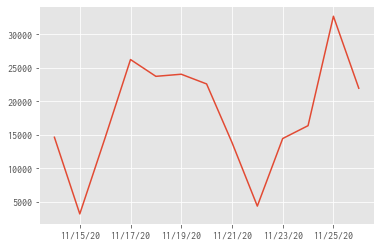

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

277.7823364607623